In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# Pretty display for notebooks
%matplotlib inline

In [9]:
# read train and test json file
train = pd.read_json('/home/amin/Desktop/Kaggle/data/train.json')
test = pd.read_json('/home/amin/Desktop/Kaggle/data/test.json')

In [10]:
prob = train['interest_level'].value_counts() / train.shape[0]
level = ['high', 'low', 'medium']

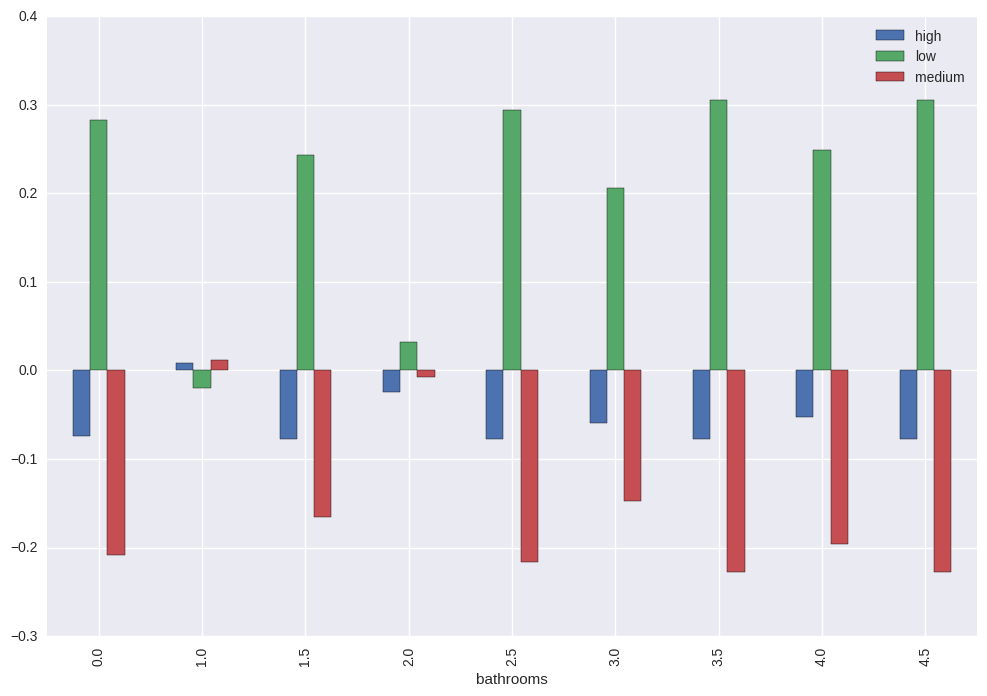

In [11]:
tt = train[['interest_level', 'bathrooms']]
tt.loc[tt['bathrooms'] > 4.0, 'bathrooms'] = 4.5
      
bath = tt.groupby(['bathrooms', 'interest_level']).size().reset_index()
bath = pd.pivot_table(bath, index=['bathrooms'], columns=['interest_level'])
bath.columns = level
bath = bath.fillna(0)
bath['sum'] = bath.sum(axis=1)

for ll in level:
    bath[ll] = (bath[ll] / bath['sum']) - prob[ll]
    
fig, ax = plt.subplots(figsize = (12,8))
bath[level].plot.bar(ax = ax)
fig.show()

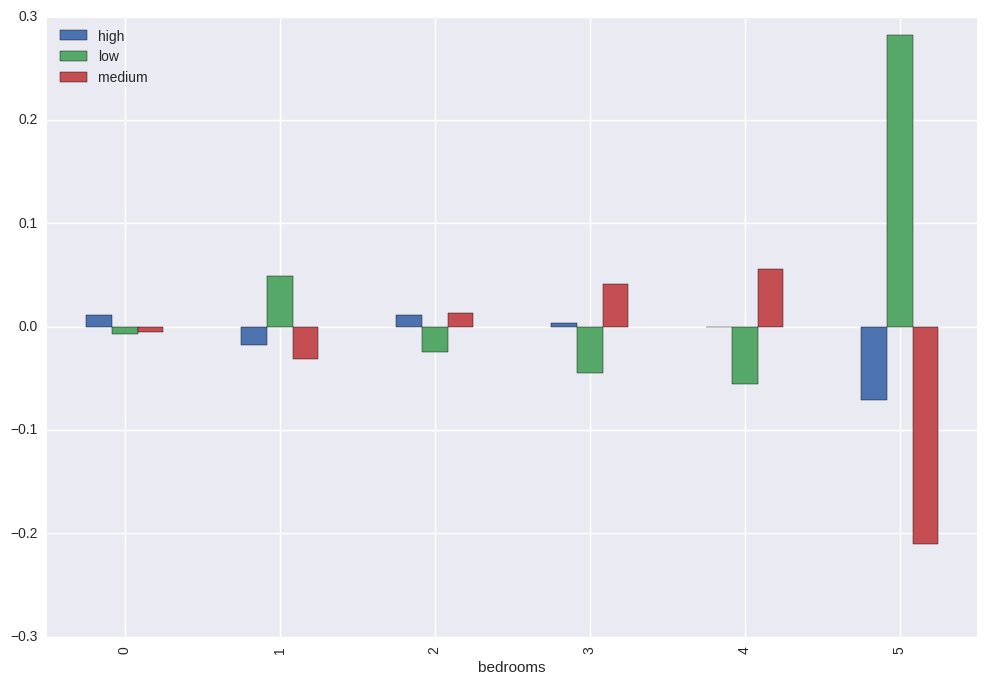

In [12]:
# bedrooms
tt = train[['interest_level', 'bedrooms']]
tt.loc[tt['bedrooms'] > 4.0, 'bedrooms'] = 5
      
bath = tt.groupby(['bedrooms', 'interest_level']).size().reset_index()
bath = pd.pivot_table(bath, index=['bedrooms'], columns=['interest_level'])
bath.columns = level
bath = bath.fillna(0)
bath['sum'] = bath.sum(axis=1)

for ll in level:
    bath[ll] = (bath[ll] / bath['sum']) - prob[ll]
    
fig, ax = plt.subplots(figsize = (12,8))
bath[level].plot.bar(ax = ax)

high
low
medium


(3.5, 5.0)

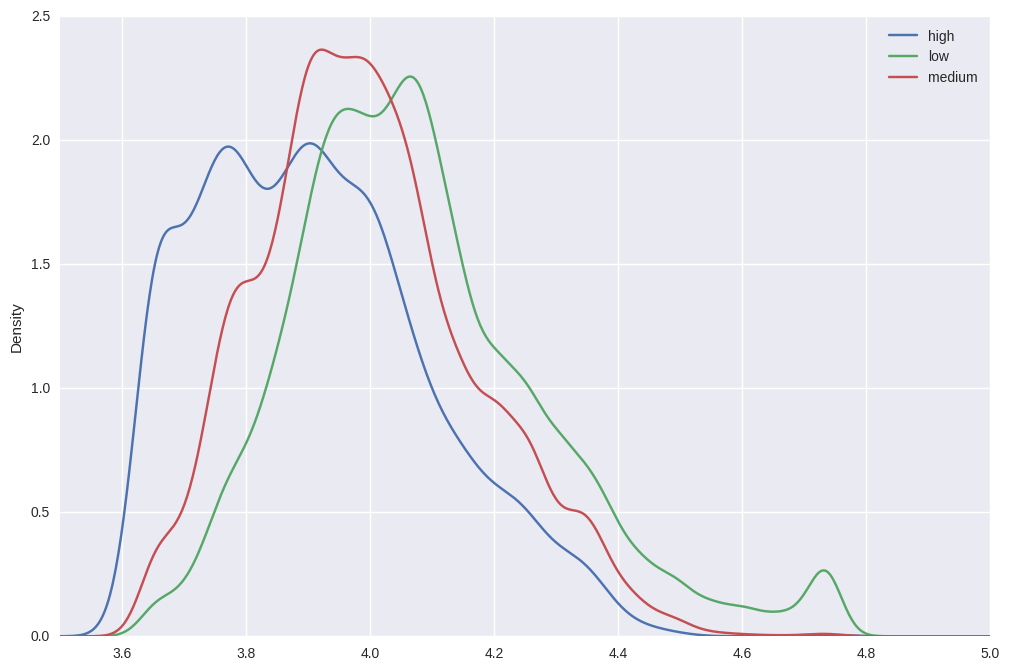

In [13]:
# price
tt = train[['interest_level', 'price']]

ulimit = np.percentile(tt.price.values, 99)
dlimit = np.percentile(tt.price.values, 1)

tt.loc[tt['price']>ulimit, 'price'] = ulimit
tt.loc[tt['price']<dlimit, 'price'] = dlimit

fig, ax = plt.subplots(figsize = (12,8))
for label, group in tt.groupby('interest_level'):
    print label
    group['price'].apply(lambda x: np.log(np.sqrt(x))).plot(kind='kde', ax=ax, label=label)
plt.legend()
ax.set_xlim([3.5,5.0])